## Assignment 1

***


*Authored by Arip Asadulaev & Manh Lab*

*Adapted by Alexander Panfilov*

***


The assignment is split into two parts: at first, you will implement classical GAN for the MNIST dataset, and after, you will enhance your results with DCGAN and the CIFAR10 dataset. 

Good luck!

## 1. GAN
*Source: <a href="https://arxiv.org/pdf/1406.2661.pdf" target="_blank">Goodfellow, Ian J., et al. "Generative Adversarial Networks." arXiv preprint arXiv:1406.2661 (2014)</a>.*

In 2014, Ian Goodfellow and his colleagues at the University of Montreal published a stunning paper introducing the world to GANs, or generative adversarial networks. The models play two distinct (literally, adversarial) roles. Given some real data set $\mathcal{X}$, $G$ is the generator, trying to create fake data that looks just like the genuine data, while $D$ is the discriminator, getting data from either the real set or $G$ and labeling the difference.

Goodfellow’s metaphor (and a fine one it is) was that $G$ was like a team of forgers trying to match real paintings with their output, while $D$ was the team of detectives trying to tell the difference. (Except in this case, the forgers $G$ never get to see the original data — only the judgments of $D$. They’re like blind forgers.)

<img src="https://production-media.paperswithcode.com/methods/gan.jpeg" style="display=block; margin:auto"/>
<p style="text-align: center">
    <b>Picture taken from the <a href="https://paperswithcode.com/method/gan" target="_blank">paperswithcode</a> website. There you can find a whole bunch of papers on GANs with implementation.</b>
</p>

In [23]:
import sys
sys.path.append('..')
from importlib import reload

import src.gan
reload(src.gan)
from src.gan import Generator, Discriminator
import src.dc_gan
reload(src.dc_gan)
from src.dc_gan import DCGenerator, DCDiscriminator
import src.gan_trainer
reload(src.gan_trainer)
from src.gan_trainer import GanTrainer
import src.image_utils
reload(src.image_utils)
from src.image_utils import ImageUtils

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
from torchvision.transforms import ToPILImage

%matplotlib inline
plt.style.use("ggplot")

In [24]:
adam_lr = 0.0002
sqd_lr = 0.01

noize_size = 64  
image_size = 28
hidden_size = 256

batch_size = 100
epochs = 300

data_dir = 'data'
generated_images_dir = 'mnist_images'

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [25]:
mnist_dataset = ImageUtils.read_mnist_dataset(data_dir)

(array([55.,  4.,  3.,  0.,  3.,  2.,  1.,  0.,  1.,  3.,  1.,  3.,  2.,
         1., 21.]),
 array([0.        , 0.06614379, 0.13228758, 0.19843137, 0.26457515,
        0.33071896, 0.39686275, 0.46300653, 0.52915031, 0.59529412,
        0.66143793, 0.72758168, 0.79372549, 0.8598693 , 0.92601305,
        0.99215686]),
 <BarContainer object of 15 artists>)

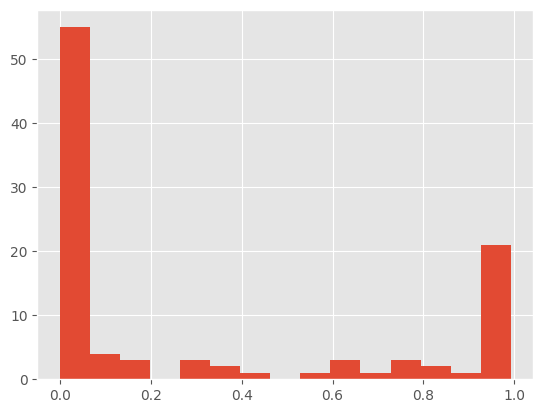

In [26]:
img, label = mnist_dataset[0]
plt.hist(img[:, 5:15, 5:15].flatten(), bins=15)

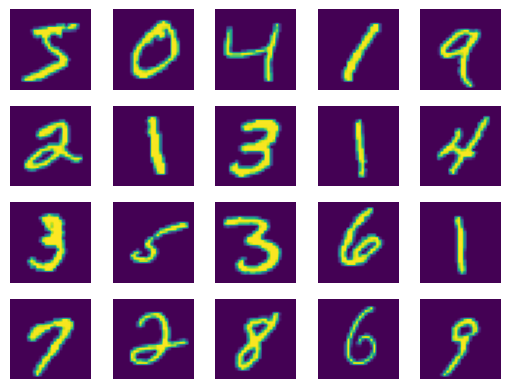

In [27]:
for i in range(20):
    image, label = mnist_dataset[i]
    ax = plt.subplot(4, 5, i + 1)
    ax.imshow(ToPILImage()(image))
    ax.axis('off')

In [28]:
generator = Generator(noize_size, hidden_size, image_size)
discriminator = Discriminator(image_size, hidden_size)

In [29]:
y = generator(torch.randn(2, noize_size))
discriminator(y)

tensor([[0.4997],
        [0.4953]], grad_fn=<SigmoidBackward0>)

In [30]:
loss_function = nn.BCELoss()

g_optimizer = optim.Adam(generator.parameters(), lr=adam_lr)
d_optimizer = optim.Adam(discriminator.parameters(), lr=adam_lr)

In [ ]:
gan_trainer = GanTrainer(device)
gan_trainer.train(
    mnist_dataset, generator, discriminator, g_optimizer, d_optimizer, loss_function, 
    batch_size, (noize_size,), (image_size ** 2,), (1, image_size, image_size), epochs, generated_images_dir)

Epoch [0/300], Step [100/600], d_loss: 0.4265, g_loss: 3.6620, D(x): 0.90, D(G(z)): 0.18
Epoch [0/300], Step [200/600], d_loss: 0.4001, g_loss: 2.5068, D(x): 0.86, D(G(z)): 0.13
Epoch [0/300], Step [300/600], d_loss: 0.3263, g_loss: 3.8339, D(x): 0.87, D(G(z)): 0.08
Epoch [0/300], Step [400/600], d_loss: 0.3795, g_loss: 2.5077, D(x): 0.90, D(G(z)): 0.19
Epoch [0/300], Step [500/600], d_loss: 0.5280, g_loss: 2.8846, D(x): 0.81, D(G(z)): 0.13
Epoch [0/300], Step [600/600], d_loss: 0.4348, g_loss: 3.1842, D(x): 0.85, D(G(z)): 0.12
Saving mnist_images/fake_images_1.png
Epoch [1/300], Step [100/600], d_loss: 0.4565, g_loss: 2.8819, D(x): 0.85, D(G(z)): 0.16
Epoch [1/300], Step [200/600], d_loss: 0.3867, g_loss: 2.4741, D(x): 0.88, D(G(z)): 0.16
Epoch [1/300], Step [300/600], d_loss: 0.4217, g_loss: 2.3595, D(x): 0.86, D(G(z)): 0.16
Epoch [1/300], Step [400/600], d_loss: 0.5076, g_loss: 2.6842, D(x): 0.86, D(G(z)): 0.21
Epoch [1/300], Step [500/600], d_loss: 0.3436, g_loss: 3.6922, D(x): 0.8

Epoch [14/300], Step [300/600], d_loss: 0.5274, g_loss: 2.1176, D(x): 0.82, D(G(z)): 0.16
Epoch [14/300], Step [400/600], d_loss: 0.4722, g_loss: 2.6799, D(x): 0.84, D(G(z)): 0.15
Epoch [14/300], Step [500/600], d_loss: 0.4651, g_loss: 2.4472, D(x): 0.83, D(G(z)): 0.14
Epoch [14/300], Step [600/600], d_loss: 0.6029, g_loss: 2.2667, D(x): 0.79, D(G(z)): 0.16
Saving mnist_images/fake_images_15.png
Epoch [15/300], Step [100/600], d_loss: 0.8311, g_loss: 2.0167, D(x): 0.74, D(G(z)): 0.21
Epoch [15/300], Step [200/600], d_loss: 0.6154, g_loss: 2.2458, D(x): 0.81, D(G(z)): 0.22
Epoch [15/300], Step [300/600], d_loss: 0.6584, g_loss: 2.2549, D(x): 0.74, D(G(z)): 0.14
Epoch [15/300], Step [400/600], d_loss: 0.4846, g_loss: 2.2096, D(x): 0.86, D(G(z)): 0.19
Epoch [15/300], Step [500/600], d_loss: 0.9795, g_loss: 2.3418, D(x): 0.68, D(G(z)): 0.19
Epoch [15/300], Step [600/600], d_loss: 0.6183, g_loss: 2.1306, D(x): 0.78, D(G(z)): 0.20
Saving mnist_images/fake_images_16.png
Epoch [16/300], Step [

Epoch [28/300], Step [400/600], d_loss: 0.7291, g_loss: 2.0766, D(x): 0.83, D(G(z)): 0.30
Epoch [28/300], Step [500/600], d_loss: 0.5901, g_loss: 2.8784, D(x): 0.78, D(G(z)): 0.16
Epoch [28/300], Step [600/600], d_loss: 0.6832, g_loss: 1.8287, D(x): 0.74, D(G(z)): 0.17
Saving mnist_images/fake_images_29.png
Epoch [29/300], Step [100/600], d_loss: 0.8271, g_loss: 2.0195, D(x): 0.75, D(G(z)): 0.26
Epoch [29/300], Step [200/600], d_loss: 0.5978, g_loss: 1.6901, D(x): 0.85, D(G(z)): 0.27
Epoch [29/300], Step [300/600], d_loss: 0.7328, g_loss: 2.3219, D(x): 0.87, D(G(z)): 0.30
Epoch [29/300], Step [400/600], d_loss: 0.5777, g_loss: 1.7045, D(x): 0.76, D(G(z)): 0.12
Epoch [29/300], Step [500/600], d_loss: 0.5601, g_loss: 2.9048, D(x): 0.82, D(G(z)): 0.17
Epoch [29/300], Step [600/600], d_loss: 0.7554, g_loss: 2.3764, D(x): 0.79, D(G(z)): 0.22
Saving mnist_images/fake_images_30.png
Epoch [30/300], Step [100/600], d_loss: 0.4685, g_loss: 2.4882, D(x): 0.81, D(G(z)): 0.08
Epoch [30/300], Step [

Epoch [42/300], Step [500/600], d_loss: 0.8704, g_loss: 2.9048, D(x): 0.70, D(G(z)): 0.16
Epoch [42/300], Step [600/600], d_loss: 0.6637, g_loss: 2.0232, D(x): 0.82, D(G(z)): 0.27
Saving mnist_images/fake_images_43.png
Epoch [43/300], Step [100/600], d_loss: 0.6901, g_loss: 2.3461, D(x): 0.77, D(G(z)): 0.20
Epoch [43/300], Step [200/600], d_loss: 0.6296, g_loss: 2.1836, D(x): 0.76, D(G(z)): 0.18
Epoch [43/300], Step [300/600], d_loss: 0.5606, g_loss: 2.2699, D(x): 0.78, D(G(z)): 0.16
Epoch [43/300], Step [400/600], d_loss: 0.7122, g_loss: 1.9361, D(x): 0.78, D(G(z)): 0.23
Epoch [43/300], Step [500/600], d_loss: 0.7651, g_loss: 1.4462, D(x): 0.82, D(G(z)): 0.31
Epoch [43/300], Step [600/600], d_loss: 0.5525, g_loss: 2.4972, D(x): 0.84, D(G(z)): 0.22
Saving mnist_images/fake_images_44.png
Epoch [44/300], Step [100/600], d_loss: 0.4794, g_loss: 2.0566, D(x): 0.83, D(G(z)): 0.18
Epoch [44/300], Step [200/600], d_loss: 0.5742, g_loss: 2.5671, D(x): 0.78, D(G(z)): 0.18
Epoch [44/300], Step [

Epoch [56/300], Step [600/600], d_loss: 0.8443, g_loss: 1.8326, D(x): 0.70, D(G(z)): 0.25
Saving mnist_images/fake_images_57.png
Epoch [57/300], Step [100/600], d_loss: 0.6686, g_loss: 1.7782, D(x): 0.79, D(G(z)): 0.22
Epoch [57/300], Step [200/600], d_loss: 0.6941, g_loss: 2.1862, D(x): 0.79, D(G(z)): 0.24
Epoch [57/300], Step [300/600], d_loss: 0.8240, g_loss: 1.6293, D(x): 0.78, D(G(z)): 0.31
Epoch [57/300], Step [400/600], d_loss: 0.7148, g_loss: 2.1386, D(x): 0.75, D(G(z)): 0.21
Epoch [57/300], Step [500/600], d_loss: 0.7527, g_loss: 2.3550, D(x): 0.77, D(G(z)): 0.24
Epoch [57/300], Step [600/600], d_loss: 0.8064, g_loss: 1.6737, D(x): 0.76, D(G(z)): 0.25
Saving mnist_images/fake_images_58.png
Epoch [58/300], Step [100/600], d_loss: 0.7029, g_loss: 2.3244, D(x): 0.79, D(G(z)): 0.25
Epoch [58/300], Step [200/600], d_loss: 0.7384, g_loss: 1.9881, D(x): 0.81, D(G(z)): 0.29
Epoch [58/300], Step [300/600], d_loss: 0.5573, g_loss: 2.4002, D(x): 0.82, D(G(z)): 0.20
Epoch [58/300], Step [

Epoch [71/300], Step [100/600], d_loss: 0.6696, g_loss: 2.0420, D(x): 0.82, D(G(z)): 0.25
Epoch [71/300], Step [200/600], d_loss: 0.8325, g_loss: 1.6109, D(x): 0.75, D(G(z)): 0.29
Epoch [71/300], Step [300/600], d_loss: 0.6927, g_loss: 2.1309, D(x): 0.79, D(G(z)): 0.25
Epoch [71/300], Step [400/600], d_loss: 0.7852, g_loss: 1.7746, D(x): 0.78, D(G(z)): 0.27
Epoch [71/300], Step [500/600], d_loss: 0.7082, g_loss: 1.9124, D(x): 0.78, D(G(z)): 0.24
Epoch [71/300], Step [600/600], d_loss: 0.7576, g_loss: 1.6122, D(x): 0.77, D(G(z)): 0.28
Saving mnist_images/fake_images_72.png
Epoch [72/300], Step [100/600], d_loss: 0.6432, g_loss: 1.8224, D(x): 0.80, D(G(z)): 0.25
Epoch [72/300], Step [200/600], d_loss: 0.5784, g_loss: 2.0489, D(x): 0.76, D(G(z)): 0.18
Epoch [72/300], Step [300/600], d_loss: 0.8170, g_loss: 2.0770, D(x): 0.67, D(G(z)): 0.16
Epoch [72/300], Step [400/600], d_loss: 0.7705, g_loss: 1.8657, D(x): 0.69, D(G(z)): 0.21
Epoch [72/300], Step [500/600], d_loss: 0.6743, g_loss: 1.828

Epoch [85/300], Step [200/600], d_loss: 0.8857, g_loss: 2.0005, D(x): 0.69, D(G(z)): 0.23
Epoch [85/300], Step [300/600], d_loss: 0.4883, g_loss: 1.9578, D(x): 0.85, D(G(z)): 0.21
Epoch [85/300], Step [400/600], d_loss: 0.7084, g_loss: 1.8570, D(x): 0.79, D(G(z)): 0.26
Epoch [85/300], Step [500/600], d_loss: 0.7028, g_loss: 1.9703, D(x): 0.79, D(G(z)): 0.24
Epoch [85/300], Step [600/600], d_loss: 0.7256, g_loss: 1.8114, D(x): 0.80, D(G(z)): 0.27
Saving mnist_images/fake_images_86.png
Epoch [86/300], Step [100/600], d_loss: 0.8677, g_loss: 1.6412, D(x): 0.83, D(G(z)): 0.35
Epoch [86/300], Step [200/600], d_loss: 0.8040, g_loss: 1.8543, D(x): 0.69, D(G(z)): 0.23
Epoch [86/300], Step [300/600], d_loss: 0.7963, g_loss: 1.6274, D(x): 0.72, D(G(z)): 0.22
Epoch [86/300], Step [400/600], d_loss: 0.6151, g_loss: 2.0180, D(x): 0.76, D(G(z)): 0.19
Epoch [86/300], Step [500/600], d_loss: 0.8077, g_loss: 1.6357, D(x): 0.80, D(G(z)): 0.31
Epoch [86/300], Step [600/600], d_loss: 0.7474, g_loss: 1.691

Epoch [99/300], Step [300/600], d_loss: 0.6892, g_loss: 1.6382, D(x): 0.80, D(G(z)): 0.25
Epoch [99/300], Step [400/600], d_loss: 0.8461, g_loss: 1.7362, D(x): 0.69, D(G(z)): 0.23
Epoch [99/300], Step [500/600], d_loss: 0.8063, g_loss: 1.7755, D(x): 0.74, D(G(z)): 0.24
Epoch [99/300], Step [600/600], d_loss: 0.8456, g_loss: 2.0609, D(x): 0.73, D(G(z)): 0.27
Saving mnist_images/fake_images_100.png
Epoch [100/300], Step [100/600], d_loss: 0.8148, g_loss: 1.6884, D(x): 0.72, D(G(z)): 0.27
Epoch [100/300], Step [200/600], d_loss: 0.6558, g_loss: 1.6648, D(x): 0.76, D(G(z)): 0.22
Epoch [100/300], Step [300/600], d_loss: 0.6630, g_loss: 2.0727, D(x): 0.83, D(G(z)): 0.26
Epoch [100/300], Step [400/600], d_loss: 0.9743, g_loss: 1.7324, D(x): 0.68, D(G(z)): 0.26
Epoch [100/300], Step [500/600], d_loss: 0.8457, g_loss: 1.5854, D(x): 0.71, D(G(z)): 0.29
Epoch [100/300], Step [600/600], d_loss: 0.7730, g_loss: 1.8243, D(x): 0.78, D(G(z)): 0.28
Saving mnist_images/fake_images_101.png
Epoch [101/300

Epoch [113/300], Step [300/600], d_loss: 0.7866, g_loss: 1.4631, D(x): 0.78, D(G(z)): 0.31
Epoch [113/300], Step [400/600], d_loss: 0.9555, g_loss: 1.7994, D(x): 0.74, D(G(z)): 0.33
Epoch [113/300], Step [500/600], d_loss: 0.7593, g_loss: 2.0695, D(x): 0.72, D(G(z)): 0.22
Epoch [113/300], Step [600/600], d_loss: 0.7163, g_loss: 1.7216, D(x): 0.77, D(G(z)): 0.22
Saving mnist_images/fake_images_114.png
Epoch [114/300], Step [100/600], d_loss: 0.7327, g_loss: 1.9097, D(x): 0.76, D(G(z)): 0.25
Epoch [114/300], Step [200/600], d_loss: 0.7543, g_loss: 1.9146, D(x): 0.77, D(G(z)): 0.27
Epoch [114/300], Step [300/600], d_loss: 0.8088, g_loss: 1.7655, D(x): 0.73, D(G(z)): 0.28
Epoch [114/300], Step [400/600], d_loss: 0.8599, g_loss: 1.6320, D(x): 0.71, D(G(z)): 0.25
Epoch [114/300], Step [500/600], d_loss: 0.8562, g_loss: 1.7909, D(x): 0.77, D(G(z)): 0.28
Epoch [114/300], Step [600/600], d_loss: 0.7551, g_loss: 1.8985, D(x): 0.74, D(G(z)): 0.22
Saving mnist_images/fake_images_115.png
Epoch [115

Epoch [127/300], Step [300/600], d_loss: 0.8175, g_loss: 1.7821, D(x): 0.80, D(G(z)): 0.31
Epoch [127/300], Step [400/600], d_loss: 0.8004, g_loss: 2.4411, D(x): 0.74, D(G(z)): 0.23
Epoch [127/300], Step [500/600], d_loss: 0.7285, g_loss: 2.0591, D(x): 0.74, D(G(z)): 0.21
Epoch [127/300], Step [600/600], d_loss: 0.7188, g_loss: 2.1332, D(x): 0.71, D(G(z)): 0.19
Saving mnist_images/fake_images_128.png
Epoch [128/300], Step [100/600], d_loss: 0.7447, g_loss: 1.5895, D(x): 0.75, D(G(z)): 0.24
Epoch [128/300], Step [200/600], d_loss: 0.7457, g_loss: 1.8629, D(x): 0.76, D(G(z)): 0.27
Epoch [128/300], Step [300/600], d_loss: 0.7151, g_loss: 1.9890, D(x): 0.78, D(G(z)): 0.23
Epoch [128/300], Step [400/600], d_loss: 0.8670, g_loss: 1.6014, D(x): 0.72, D(G(z)): 0.29
Epoch [128/300], Step [500/600], d_loss: 0.7837, g_loss: 1.8815, D(x): 0.73, D(G(z)): 0.25
Epoch [128/300], Step [600/600], d_loss: 0.7605, g_loss: 2.1456, D(x): 0.70, D(G(z)): 0.20
Saving mnist_images/fake_images_129.png
Epoch [129

Epoch [141/300], Step [300/600], d_loss: 0.6596, g_loss: 1.8902, D(x): 0.83, D(G(z)): 0.26
Epoch [141/300], Step [400/600], d_loss: 0.8614, g_loss: 1.7798, D(x): 0.73, D(G(z)): 0.28
Epoch [141/300], Step [500/600], d_loss: 0.7314, g_loss: 1.7145, D(x): 0.75, D(G(z)): 0.24
Epoch [141/300], Step [600/600], d_loss: 0.7823, g_loss: 1.8657, D(x): 0.68, D(G(z)): 0.18
Saving mnist_images/fake_images_142.png
Epoch [142/300], Step [100/600], d_loss: 0.8023, g_loss: 2.0618, D(x): 0.75, D(G(z)): 0.23
Epoch [142/300], Step [200/600], d_loss: 0.7881, g_loss: 1.4754, D(x): 0.79, D(G(z)): 0.30
Epoch [142/300], Step [300/600], d_loss: 0.7301, g_loss: 1.8332, D(x): 0.74, D(G(z)): 0.22
Epoch [142/300], Step [400/600], d_loss: 0.8454, g_loss: 1.8938, D(x): 0.76, D(G(z)): 0.28
Epoch [142/300], Step [500/600], d_loss: 0.8355, g_loss: 2.1010, D(x): 0.71, D(G(z)): 0.21
Epoch [142/300], Step [600/600], d_loss: 0.7901, g_loss: 2.0311, D(x): 0.72, D(G(z)): 0.23
Saving mnist_images/fake_images_143.png
Epoch [143

Epoch [155/300], Step [300/600], d_loss: 0.8738, g_loss: 1.5507, D(x): 0.74, D(G(z)): 0.26
Epoch [155/300], Step [400/600], d_loss: 0.7928, g_loss: 1.7067, D(x): 0.74, D(G(z)): 0.24
Epoch [155/300], Step [500/600], d_loss: 0.6632, g_loss: 1.9289, D(x): 0.75, D(G(z)): 0.21
Epoch [155/300], Step [600/600], d_loss: 0.8953, g_loss: 1.8397, D(x): 0.67, D(G(z)): 0.20
Saving mnist_images/fake_images_156.png
Epoch [156/300], Step [100/600], d_loss: 0.8308, g_loss: 1.8137, D(x): 0.74, D(G(z)): 0.26
Epoch [156/300], Step [200/600], d_loss: 0.7157, g_loss: 1.6049, D(x): 0.78, D(G(z)): 0.26
Epoch [156/300], Step [300/600], d_loss: 0.6998, g_loss: 1.7131, D(x): 0.78, D(G(z)): 0.24
Epoch [156/300], Step [400/600], d_loss: 0.8307, g_loss: 1.6567, D(x): 0.76, D(G(z)): 0.31
Epoch [156/300], Step [500/600], d_loss: 0.8868, g_loss: 1.8738, D(x): 0.77, D(G(z)): 0.32
Epoch [156/300], Step [600/600], d_loss: 0.6742, g_loss: 1.9172, D(x): 0.74, D(G(z)): 0.17
Saving mnist_images/fake_images_157.png
Epoch [157

Epoch [169/300], Step [300/600], d_loss: 0.6388, g_loss: 1.9120, D(x): 0.80, D(G(z)): 0.24
Epoch [169/300], Step [400/600], d_loss: 0.9405, g_loss: 1.6581, D(x): 0.69, D(G(z)): 0.29
Epoch [169/300], Step [500/600], d_loss: 0.6735, g_loss: 1.8847, D(x): 0.80, D(G(z)): 0.24
Epoch [169/300], Step [600/600], d_loss: 1.0107, g_loss: 1.8420, D(x): 0.66, D(G(z)): 0.23
Saving mnist_images/fake_images_170.png
Epoch [170/300], Step [100/600], d_loss: 0.6201, g_loss: 1.7597, D(x): 0.83, D(G(z)): 0.25
Epoch [170/300], Step [200/600], d_loss: 0.8957, g_loss: 1.4736, D(x): 0.74, D(G(z)): 0.31
Epoch [170/300], Step [300/600], d_loss: 0.7560, g_loss: 1.8356, D(x): 0.78, D(G(z)): 0.27
Epoch [170/300], Step [400/600], d_loss: 0.9845, g_loss: 1.6078, D(x): 0.73, D(G(z)): 0.30
Epoch [170/300], Step [500/600], d_loss: 0.6246, g_loss: 1.7797, D(x): 0.78, D(G(z)): 0.22
Epoch [170/300], Step [600/600], d_loss: 0.6860, g_loss: 1.8207, D(x): 0.77, D(G(z)): 0.23
Saving mnist_images/fake_images_171.png
Epoch [171

Epoch [183/300], Step [300/600], d_loss: 0.7298, g_loss: 1.5611, D(x): 0.74, D(G(z)): 0.21
Epoch [183/300], Step [400/600], d_loss: 0.7989, g_loss: 1.9162, D(x): 0.77, D(G(z)): 0.28
Epoch [183/300], Step [500/600], d_loss: 0.6315, g_loss: 1.7267, D(x): 0.81, D(G(z)): 0.25
Epoch [183/300], Step [600/600], d_loss: 0.6812, g_loss: 1.7369, D(x): 0.75, D(G(z)): 0.21
Saving mnist_images/fake_images_184.png
Epoch [184/300], Step [100/600], d_loss: 0.7068, g_loss: 1.9133, D(x): 0.78, D(G(z)): 0.24
Epoch [184/300], Step [200/600], d_loss: 0.9394, g_loss: 1.8689, D(x): 0.63, D(G(z)): 0.19
Epoch [184/300], Step [300/600], d_loss: 0.8373, g_loss: 1.9837, D(x): 0.72, D(G(z)): 0.25
Epoch [184/300], Step [400/600], d_loss: 0.7772, g_loss: 1.6982, D(x): 0.80, D(G(z)): 0.31
Epoch [184/300], Step [500/600], d_loss: 0.6631, g_loss: 2.1111, D(x): 0.78, D(G(z)): 0.20
Epoch [184/300], Step [600/600], d_loss: 0.7531, g_loss: 1.4818, D(x): 0.77, D(G(z)): 0.26
Saving mnist_images/fake_images_185.png
Epoch [185

Epoch [197/300], Step [300/600], d_loss: 0.7337, g_loss: 2.0035, D(x): 0.73, D(G(z)): 0.21
Epoch [197/300], Step [400/600], d_loss: 0.8145, g_loss: 1.7642, D(x): 0.71, D(G(z)): 0.22
Epoch [197/300], Step [500/600], d_loss: 0.8489, g_loss: 2.0845, D(x): 0.70, D(G(z)): 0.21
Epoch [197/300], Step [600/600], d_loss: 0.7817, g_loss: 1.6211, D(x): 0.81, D(G(z)): 0.28
Saving mnist_images/fake_images_198.png
Epoch [198/300], Step [100/600], d_loss: 0.7653, g_loss: 2.1867, D(x): 0.78, D(G(z)): 0.25
Epoch [198/300], Step [200/600], d_loss: 0.7012, g_loss: 2.0200, D(x): 0.81, D(G(z)): 0.26
Epoch [198/300], Step [300/600], d_loss: 0.6650, g_loss: 1.6971, D(x): 0.75, D(G(z)): 0.19
Epoch [198/300], Step [400/600], d_loss: 0.7623, g_loss: 1.6740, D(x): 0.75, D(G(z)): 0.25
Epoch [198/300], Step [500/600], d_loss: 0.6143, g_loss: 1.8614, D(x): 0.80, D(G(z)): 0.21
Epoch [198/300], Step [600/600], d_loss: 0.7458, g_loss: 1.9084, D(x): 0.77, D(G(z)): 0.26
Saving mnist_images/fake_images_199.png
Epoch [199

Epoch [211/300], Step [300/600], d_loss: 0.8460, g_loss: 1.9542, D(x): 0.76, D(G(z)): 0.28
Epoch [211/300], Step [400/600], d_loss: 0.6346, g_loss: 1.8887, D(x): 0.80, D(G(z)): 0.24
Epoch [211/300], Step [500/600], d_loss: 0.7309, g_loss: 1.7087, D(x): 0.76, D(G(z)): 0.23
Epoch [211/300], Step [600/600], d_loss: 0.7113, g_loss: 1.8433, D(x): 0.75, D(G(z)): 0.21
Saving mnist_images/fake_images_212.png
Epoch [212/300], Step [100/600], d_loss: 0.8054, g_loss: 1.8921, D(x): 0.72, D(G(z)): 0.18
Epoch [212/300], Step [200/600], d_loss: 0.7019, g_loss: 2.0043, D(x): 0.79, D(G(z)): 0.22
Epoch [212/300], Step [300/600], d_loss: 0.8022, g_loss: 1.7927, D(x): 0.70, D(G(z)): 0.21
Epoch [212/300], Step [400/600], d_loss: 0.7929, g_loss: 1.6623, D(x): 0.77, D(G(z)): 0.27
Epoch [212/300], Step [500/600], d_loss: 0.7580, g_loss: 2.0345, D(x): 0.71, D(G(z)): 0.19
Epoch [212/300], Step [600/600], d_loss: 0.6666, g_loss: 1.8848, D(x): 0.81, D(G(z)): 0.22
Saving mnist_images/fake_images_213.png
Epoch [213

Epoch [225/300], Step [300/600], d_loss: 0.6943, g_loss: 2.0234, D(x): 0.77, D(G(z)): 0.20
Epoch [225/300], Step [400/600], d_loss: 0.6302, g_loss: 1.7844, D(x): 0.79, D(G(z)): 0.21
Epoch [225/300], Step [500/600], d_loss: 0.7689, g_loss: 1.5548, D(x): 0.76, D(G(z)): 0.22
Epoch [225/300], Step [600/600], d_loss: 0.8191, g_loss: 1.7789, D(x): 0.70, D(G(z)): 0.22
Saving mnist_images/fake_images_226.png
Epoch [226/300], Step [100/600], d_loss: 0.6536, g_loss: 1.5577, D(x): 0.81, D(G(z)): 0.25
Epoch [226/300], Step [200/600], d_loss: 0.6348, g_loss: 2.2031, D(x): 0.81, D(G(z)): 0.20
Epoch [226/300], Step [300/600], d_loss: 0.7541, g_loss: 2.0533, D(x): 0.74, D(G(z)): 0.20
Epoch [226/300], Step [400/600], d_loss: 0.5833, g_loss: 1.9588, D(x): 0.80, D(G(z)): 0.20
Epoch [226/300], Step [500/600], d_loss: 0.7273, g_loss: 1.9809, D(x): 0.78, D(G(z)): 0.25
Epoch [226/300], Step [600/600], d_loss: 0.6731, g_loss: 2.0391, D(x): 0.75, D(G(z)): 0.21
Saving mnist_images/fake_images_227.png
Epoch [227

## 2. DCGAN

*Source: <a href="https://arxiv.org/pdf/1511.06434v2.pdf" target="_blank">Radford, Alec, Luke Metz, and Soumith Chintala. "Unsupervised representation learning with deep convolutional generative adversarial networks." arXiv preprint arXiv:1511.06434 (2015)</a>.*

The goal of this part is to enhance your results achieved in the part one with DCGAN. Feel free to reuse your code, improve architecture or training scheme, etc.

In [12]:
adam_lr = 0.0002

noize_size = 100  
image_size = 64

image_channels = 3
hidden_channels = 64

batch_size = 128
epochs = 300

data_dir = 'data'
generated_images_dir = 'cifar_images'

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [13]:
cifar_dataset = ImageUtils.read_cifar10_dataset(data_dir, image_size)

Files already downloaded and verified


(array([ 3.,  6., 52., 36.,  6.,  4., 12., 40., 40.,  7.,  2.,  6., 22.,
        32., 32.]),
 array([0.0627451 , 0.09437909, 0.12601309, 0.15764707, 0.18928106,
        0.22091505, 0.25254902, 0.28418303, 0.315817  , 0.347451  ,
        0.37908497, 0.41071898, 0.44235295, 0.47398695, 0.50562096,
        0.53725493]),
 <BarContainer object of 15 artists>)

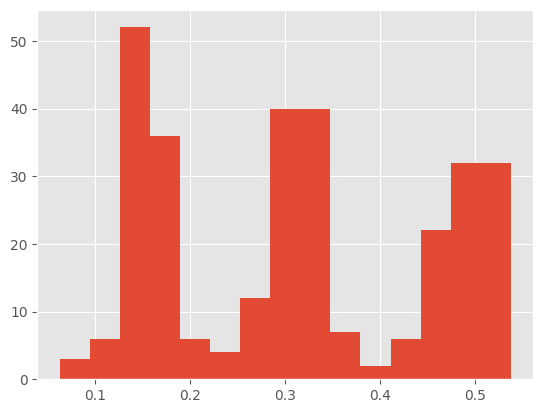

In [14]:
img, label = cifar_dataset[0]
plt.hist(img[:, 5:15, 5:15].flatten(), bins=15)

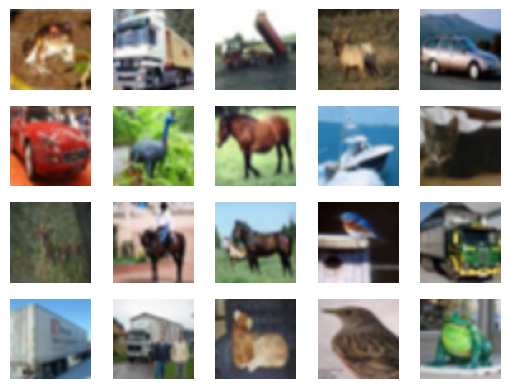

In [15]:
for i in range(20):
    image, label = cifar_dataset[i]
    ax = plt.subplot(4, 5, i + 1)
    ax.imshow(ToPILImage()(image))
    ax.axis('off')

In [16]:
dc_generator = DCGenerator(noize_size, hidden_channels, image_channels)
dc_discriminator = DCDiscriminator(image_channels, hidden_channels)

In [18]:
y_g = dc_generator(torch.randn(2, noize_size, 1, 1))
dc_discriminator(y_g)

tensor([[0.6480],
        [0.5276]], grad_fn=<ReshapeAliasBackward0>)

In [20]:
dc_loss_function = nn.BCELoss()

dc_g_optimizer = optim.Adam(dc_generator.parameters(), lr=adam_lr)
dc_d_optimizer = optim.Adam(dc_discriminator.parameters(), lr=adam_lr)

In [22]:
gan_trainer = GanTrainer(device)
gan_trainer.train(
    cifar_dataset, dc_generator, dc_discriminator, dc_g_optimizer, dc_d_optimizer, dc_loss_function, 
    batch_size, (noize_size, 1, 1), 
    (image_channels, image_size, image_size), (image_channels, image_size, image_size), 
    epochs, generated_images_dir)